In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso,Ridge,RidgeCV,LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.shape

(571, 43)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [5]:
print(df['EL-332'].value_counts().sort_values())

WU     1
F      9
A+    20
D+    22
D     22
C-    32
C+    38
C     49
B-    62
B     67
B+    68
A     76
A-    96
Name: EL-332, dtype: int64


In [6]:
df=df.replace({'A+':1,'A':2,'A-':3,'B+':4,'B':5,'B-':6,'C+':7,'C':8,'C-':9,'D+':10,'D':11,'F':12,'WU':13,'I':13,'W':13})
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,6,10,9.0,8.0,9.0,10,11.0,9.0,6.0,...,9.0,9.0,9.0,9.0,3.0,2.0,9.0,5.0,3.0,2.205
1,CS-97002,2,11,10.0,11.0,6.0,8,11.0,2.0,10.0,...,10.0,11.0,8.0,11.0,3.0,6.0,8.0,8.0,5.0,2.008
2,CS-97003,2,5,2.0,6.0,4.0,2,6.0,4.0,3.0,...,5.0,5.0,2.0,8.0,2.0,2.0,2.0,3.0,2.0,3.608
3,CS-97004,11,7,10.0,11.0,11.0,3,10.0,9.0,11.0,...,10.0,8.0,10.0,9.0,6.0,5.0,7.0,7.0,7.0,1.906
4,CS-97005,3,3,3.0,4.0,2.0,2,3.0,4.0,2.0,...,6.0,4.0,4.0,6.0,3.0,2.0,3.0,3.0,2.0,3.448


In [7]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,570.000000,570.000000,569.000000,571.000000,569.000000,569.000000,569.000000,569.000000,...,561.000000,559.000000,559.000000,559.000000,486.000000,558.000000,558.000000,557.000000,492.000000,571.000000
mean,4.971979,6.190893,4.191228,5.357895,5.029877,4.005254,5.163445,5.077329,4.984183,5.933216,...,5.064171,5.921288,4.649374,6.509839,4.263374,3.715054,4.982079,5.125673,4.319106,2.954888
std,2.947360,2.724223,2.809148,3.107050,2.844717,2.500872,2.550821,2.948083,2.481217,3.051628,...,3.296018,2.601535,2.621006,2.588123,2.418267,2.248356,2.208934,2.612643,2.264982,0.620552
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000
25%,3.000000,4.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,4.000000,2.000000,5.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.538000
50%,4.000000,6.000000,3.000000,5.000000,4.000000,3.000000,5.000000,4.000000,4.000000,6.000000,...,4.000000,6.000000,4.000000,6.000000,3.000000,3.000000,5.000000,5.000000,4.000000,3.029000
75%,7.000000,8.000000,5.750000,8.000000,7.000000,5.000000,6.000000,7.000000,7.000000,9.000000,...,8.000000,8.000000,6.000000,8.000000,5.000000,5.000000,6.000000,7.000000,5.000000,3.451000
max,13.000000,12.000000,13.000000,13.000000,13.000000,11.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,12.000000,11.000000,13.000000,13.000000,13.000000,12.000000,12.000000,13.000000,3.985000


In [8]:
df=df.fillna(df.mean())

In [9]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,4.971979,6.190893,4.191228,5.357895,5.029877,4.005254,5.163445,5.077329,4.984183,5.933216,...,5.064171,5.921288,4.649374,6.509839,4.263374,3.715054,4.982079,5.125673,4.319106,2.954888
std,2.947360,2.724223,2.806683,3.104323,2.839722,2.500872,2.546342,2.942906,2.476861,3.046270,...,3.266977,2.574005,2.593270,2.560735,2.230682,2.222569,2.183599,2.580359,2.102171,0.620552
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000
25%,3.000000,4.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,4.000000,2.000000,5.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.538000
50%,4.000000,6.000000,3.000000,5.000000,4.000000,3.000000,5.000000,4.000000,4.000000,6.000000,...,5.000000,6.000000,4.000000,6.000000,4.000000,3.000000,5.000000,5.000000,4.000000,3.029000
75%,7.000000,8.000000,5.500000,8.000000,7.000000,5.000000,6.000000,7.000000,7.000000,9.000000,...,8.000000,8.000000,6.000000,8.000000,5.000000,4.500000,6.000000,7.000000,5.000000,3.451000
max,13.000000,12.000000,13.000000,13.000000,13.000000,11.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,12.000000,11.000000,13.000000,13.000000,13.000000,12.000000,12.000000,13.000000,3.985000


In [10]:
df=df.drop('Seat No.',axis=1)
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,6,10,9.0,8.0,9.0,10,11.0,9.0,6.0,9.0,...,9.0,9.0,9.0,9.0,3.0,2.0,9.0,5.0,3.0,2.205
1,2,11,10.0,11.0,6.0,8,11.0,2.0,10.0,11.0,...,10.0,11.0,8.0,11.0,3.0,6.0,8.0,8.0,5.0,2.008
2,2,5,2.0,6.0,4.0,2,6.0,4.0,3.0,3.0,...,5.0,5.0,2.0,8.0,2.0,2.0,2.0,3.0,2.0,3.608
3,11,7,10.0,11.0,11.0,3,10.0,9.0,11.0,7.0,...,10.0,8.0,10.0,9.0,6.0,5.0,7.0,7.0,7.0,1.906
4,3,3,3.0,4.0,2.0,2,3.0,4.0,2.0,3.0,...,6.0,4.0,4.0,6.0,3.0,2.0,3.0,3.0,2.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,5,2,2.0,3.0,1.0,2,3.0,3.0,1.0,4.0,...,3.0,3.0,2.0,2.0,2.0,4.0,4.0,5.0,2.0,3.798
567,1,2,2.0,2.0,2.0,2,2.0,3.0,2.0,2.0,...,4.0,4.0,2.0,2.0,3.0,5.0,3.0,8.0,3.0,3.772
568,5,2,3.0,4.0,2.0,2,2.0,2.0,2.0,5.0,...,3.0,5.0,2.0,4.0,2.0,8.0,4.0,3.0,3.0,3.470
569,2,4,11.0,2.0,11.0,10,6.0,9.0,6.0,9.0,...,11.0,5.0,5.0,9.0,11.0,8.0,5.0,6.0,8.0,2.193


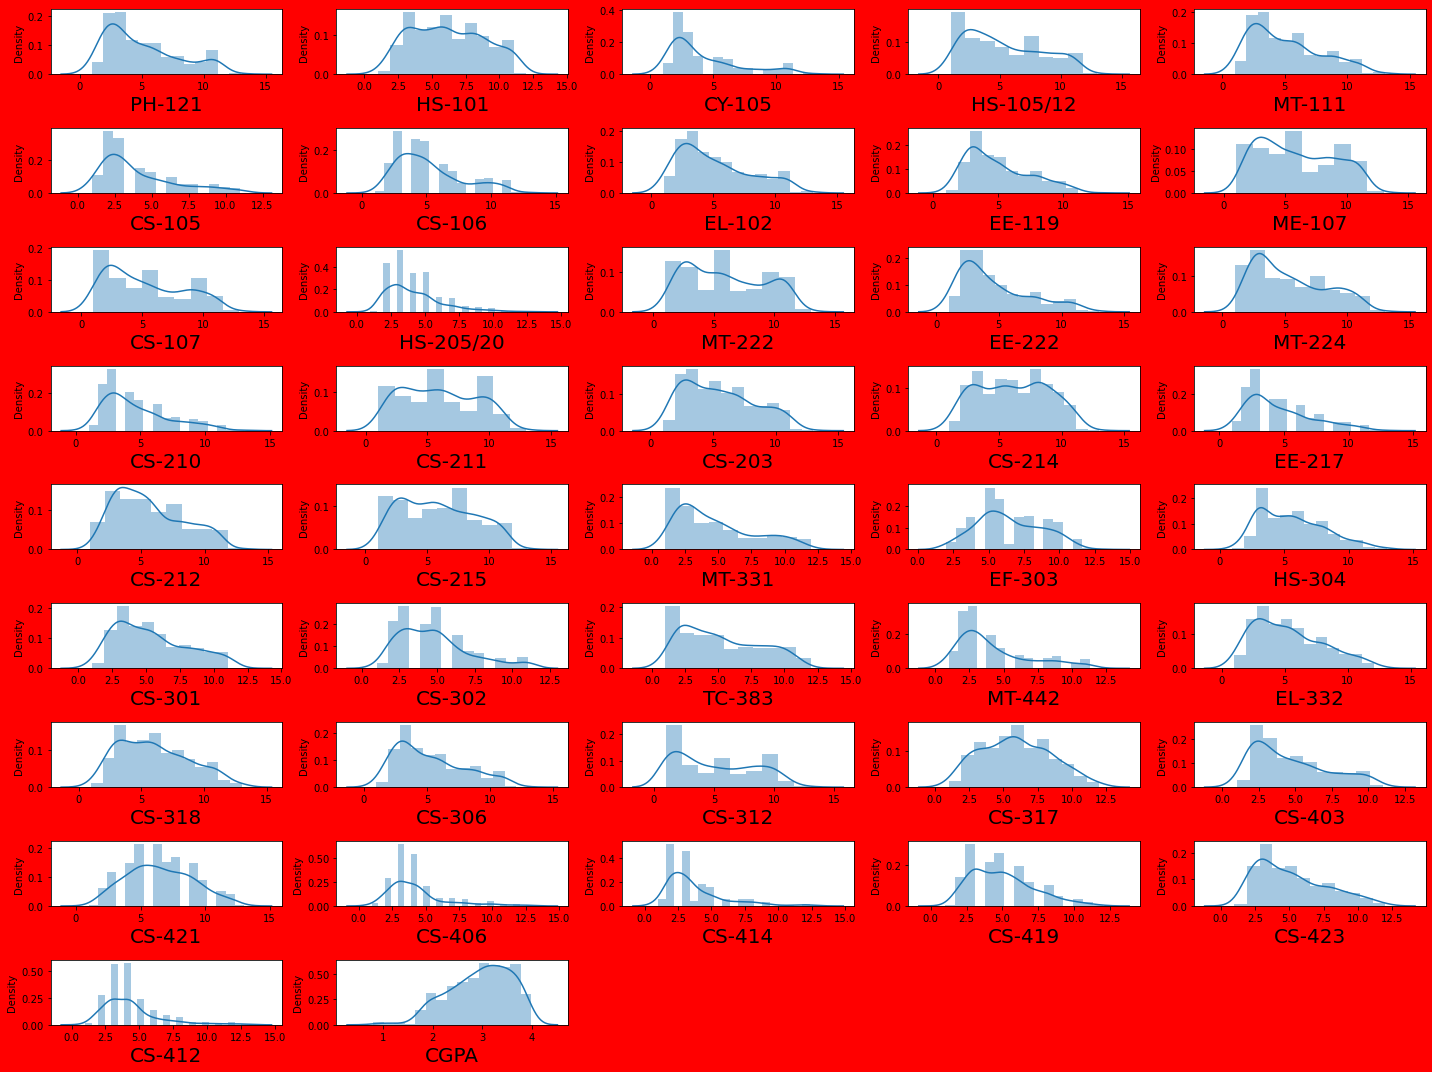

In [11]:
plt.figure(figsize=(20,15),facecolor='red')
plotno=1
for column in df:
    if plotno<=45:
        ax=plt.subplot(9,5,plotno)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()

In [12]:
x=df.drop('CGPA',axis=1)
y=df['CGPA']

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

In [14]:
bestf=SelectKBest(score_func=f_classif,k=41)
fit=bestf.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

In [15]:
feat_score=pd.concat([df_columns,df_scores],axis=1)
feat_score.columns=['Feature_Name','score']
print(feat_score.nlargest(25,'score'))

   Feature_Name     score
15       CS-210  5.556480
26       CS-302  3.914187
33       CS-317  3.781411
2        CY-105  3.618781
29       EL-332  3.302726
0        PH-121  3.281692
25       CS-301  3.097571
18       CS-214  3.037777
20       CS-212  3.035358
21       CS-215  3.033101
28       MT-442  2.993447
31       CS-306  2.947857
16       CS-211  2.743107
8        EE-119  2.603289
35       CS-421  2.475891
39       CS-423  2.380081
5        CS-105  2.376907
3     HS-105/12  2.370348
22       MT-331  2.348661
6        CS-106  2.335613
14       MT-224  2.187204
4        MT-111  2.122362
38       CS-419  2.119031
34       CS-403  2.106664
9        ME-107  2.071109


In [16]:
ndf=df[['ME-107','CS-403','CS-419','MT-111','MT-224','CS-106','MT-331','HS-105/12','CS-105','CS-423','CS-421','EE-119','CS-211','CS-306','MT-442','CS-215','CS-212','CS-214','CS-301','PH-121','EL-332','CY-105','CS-317','CS-302','CS-210']]
ndf

,ME-107,CS-403,CS-419,MT-111,MT-224,CS-106,MT-331,HS-105/12,CS-105,CS-423,...,CS-215,CS-212,CS-214,CS-301,PH-121,EL-332,CY-105,CS-317,CS-302,CS-210
0,9.0,9.0,9.0,9.0,6.0,11.0,8.0,8.0,10,5.0,...,9.0,11.0,11.0,5.0,6,8.0,9.0,9.0,8.0,7.0
1,11.0,8.0,8.0,6.0,10.0,11.0,10.0,11.0,8,8.0,...,11.0,8.0,11.0,3.0,2,8.0,10.0,11.0,10.0,10.0
2,3.0,2.0,2.0,4.0,2.0,6.0,2.0,6.0,2,3.0,...,2.0,3.0,3.0,4.0,2,4.0,2.0,5.0,3.0,2.0
3,7.0,10.0,7.0,11.0,11.0,10.0,10.0,11.0,3,7.0,...,11.0,11.0,11.0,11.0,11,10.0,10.0,8.0,6.0,8.0
4,3.0,4.0,3.0,2.0,3.0,3.0,7.0,4.0,2,3.0,...,3.0,3.0,3.0,6.0,3,3.0,3.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,4.0,2.0,4.0,1.0,2.0,3.0,2.0,3.0,2,5.0,...,3.0,5.0,2.0,3.0,5,2.0,2.0,3.0,2.0,2.0
567,2.0,2.0,3.0,2.0,5.0,2.0,2.0,2.0,2,8.0,...,5.0,2.0,1.0,2.0,1,2.0,2.0,4.0,2.0,2.0
568,5.0,2.0,4.0,2.0,5.0,2.0,2.0,4.0,2,3.0,...,5.0,4.0,5.0,4.0,5,5.0,3.0,5.0,4.0,3.0
569,9.0,5.0,5.0,11.0,5.0,6.0,7.0,2.0,10,6.0,...,10.0,10.0,8.0,8.0,2,11.0,11.0,5.0,7.0,6.0


In [18]:
x=ndf
y=df['CGPA']

In [19]:
scal=StandardScaler()
x_sc=scal.fit_transform(ndf)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2,random_state=44)

In [21]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [22]:
print('Score :',reg.predict(scal.transform([[9,8,5,6,8,9,7,5,6,7,5,9,9,7,8,9,6,9,9,9,9,8,8,7,8]])))

Score : [2.18141703]


In [23]:
reg.score(x_train,y_train)

0.9595871552738167

In [24]:
reg.score(x_test,y_test)

0.8977221956407083

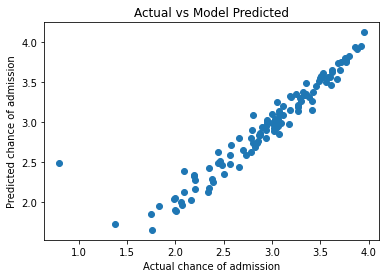

In [25]:
y_pred=reg.predict(x_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('Predicted chance of admission')
plt.title('Actual vs Model Predicted')
plt.show()

In [26]:
mean_absolute_error(y_test,y_pred)

0.10000428540088425

In [27]:
mean_squared_error(y_test,y_pred)

0.03651841228489536

In [28]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.1910979128219232

In [29]:
pickle.dump(reg,open('Score','wb'))